In [30]:
import pickle
import os
import numpy as np
import glob
from matplotlib import pyplot as plt

In [31]:
root = './results'


# experiment = 'MOLHIV-20210518-himplike'              # ~ 190k params
# experiment = 'MOLHIV-20210518-pnalike'               # ~ 530k params
# experiment = 'MOLHIV-20210518-64-025-200'            # ~ 4M params (dropout on inputs as well)
# experiment = 'MOLHIV-20210518-64-000-025-200-50'     # ~ 4M params
# -------------------------------------------------------------------------------------
# experiment = 'MOLHIV-20210519-himplike_cofaces'        # ~ 206k params
# experiment = 'MOLHIV-20210519-himplike_cofaces_e150'   # ~ 206k params
# experiment = 'MOLHIV-20210519-himplike_cofaces_e150_r12'  # ~ 206k params
# experiment = 'MOLHIV-20210522-himplike_cofaces_e150_r12'  # ~ 206k params
experiment = 'MOLHIV-20210522r-himplike_cofaces_e150_r6'  # ~ 206k params
# experiment = 'MOLHIV-20210521-himplike_cofaces_e150_r12_l5'  # ~ ??? params
# experiment = 'MOLHIV-20210519-pnalike_lr1e-3_cofaces'  # ~ 580k params

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
folder = f'{root}/{experiment}/'+'seed-{}/'

In [32]:
curve_list = list()
seeds_found = []
for seed in seeds:
    try:
        path = folder.format(seed)+'curves.pkl'
        print(f'Reading from {path}')
        with open(path, 'rb') as handle:
            curves = pickle.load(handle)
        curve_list.append(curves)
        seeds_found.append(seed)
    except FileNotFoundError:
        pass
print('{} results found.'.format(len(curve_list)))

Reading from ./results/MOLHIV-20210522r-himplike_cofaces_e150_r6/seed-0/curves.pkl
Reading from ./results/MOLHIV-20210522r-himplike_cofaces_e150_r6/seed-1/curves.pkl
Reading from ./results/MOLHIV-20210522r-himplike_cofaces_e150_r6/seed-2/curves.pkl
Reading from ./results/MOLHIV-20210522r-himplike_cofaces_e150_r6/seed-3/curves.pkl
Reading from ./results/MOLHIV-20210522r-himplike_cofaces_e150_r6/seed-4/curves.pkl
Reading from ./results/MOLHIV-20210522r-himplike_cofaces_e150_r6/seed-5/curves.pkl
Reading from ./results/MOLHIV-20210522r-himplike_cofaces_e150_r6/seed-6/curves.pkl
Reading from ./results/MOLHIV-20210522r-himplike_cofaces_e150_r6/seed-7/curves.pkl
Reading from ./results/MOLHIV-20210522r-himplike_cofaces_e150_r6/seed-8/curves.pkl
Reading from ./results/MOLHIV-20210522r-himplike_cofaces_e150_r6/seed-9/curves.pkl
6 results found.


In [33]:
def collect(curve_list, curve_name):
    return [[item for item in curves[curve_name]] for curves in curve_list]

def plot_curves(curves, ylim=None, agg=None, err_agg=None, anchors=None):
    plt.figure(dpi=300)
    if agg is not None:
        y_center = agg(np.asarray(curves), axis=0)
        if err_agg is not None:
            y_err = err_agg(np.asarray(curves), axis=0)
            plt.fill_between(range(len(curves[0])), y_center+y_err, y_center-y_err, alpha=0.2, color='cornflowerblue', linewidth=0.0)
        plt.plot(y_center, lw=0.5)
    else:
        for curve in curves:
            plt.plot(curve, lw=0.5)
    if anchors is not None:
        for anc in anchors:
            plt.axhline(y=anc, lw=0.3, color='lightgrey')
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()
    plt.close()

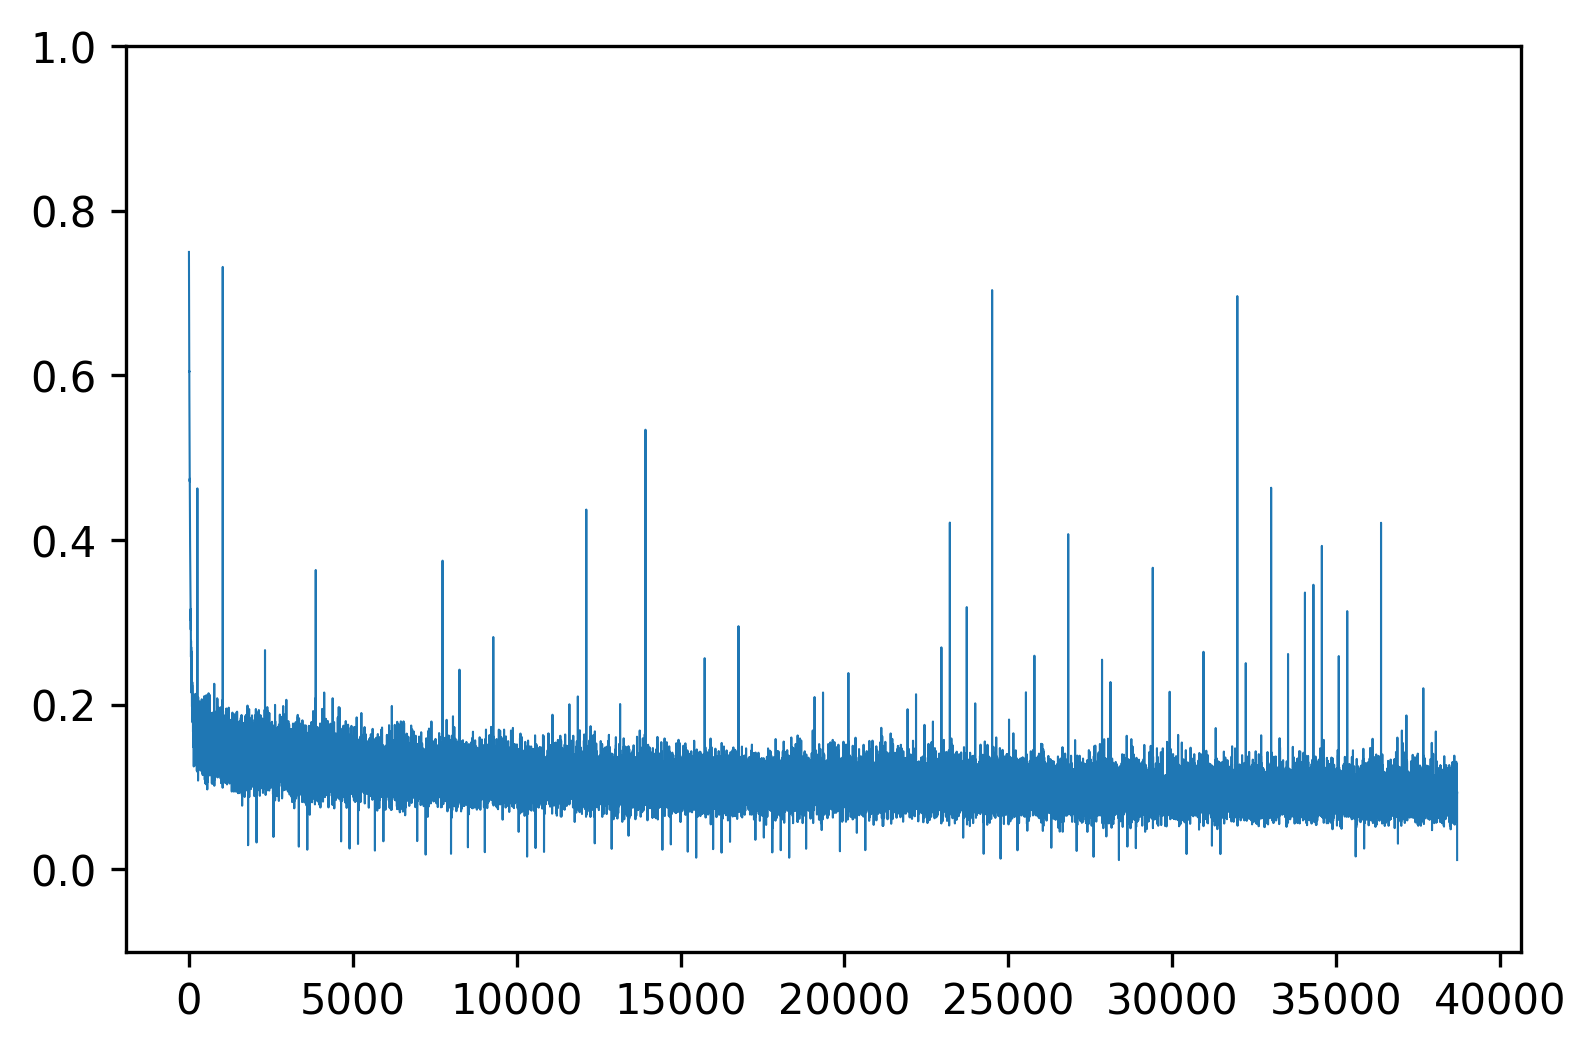

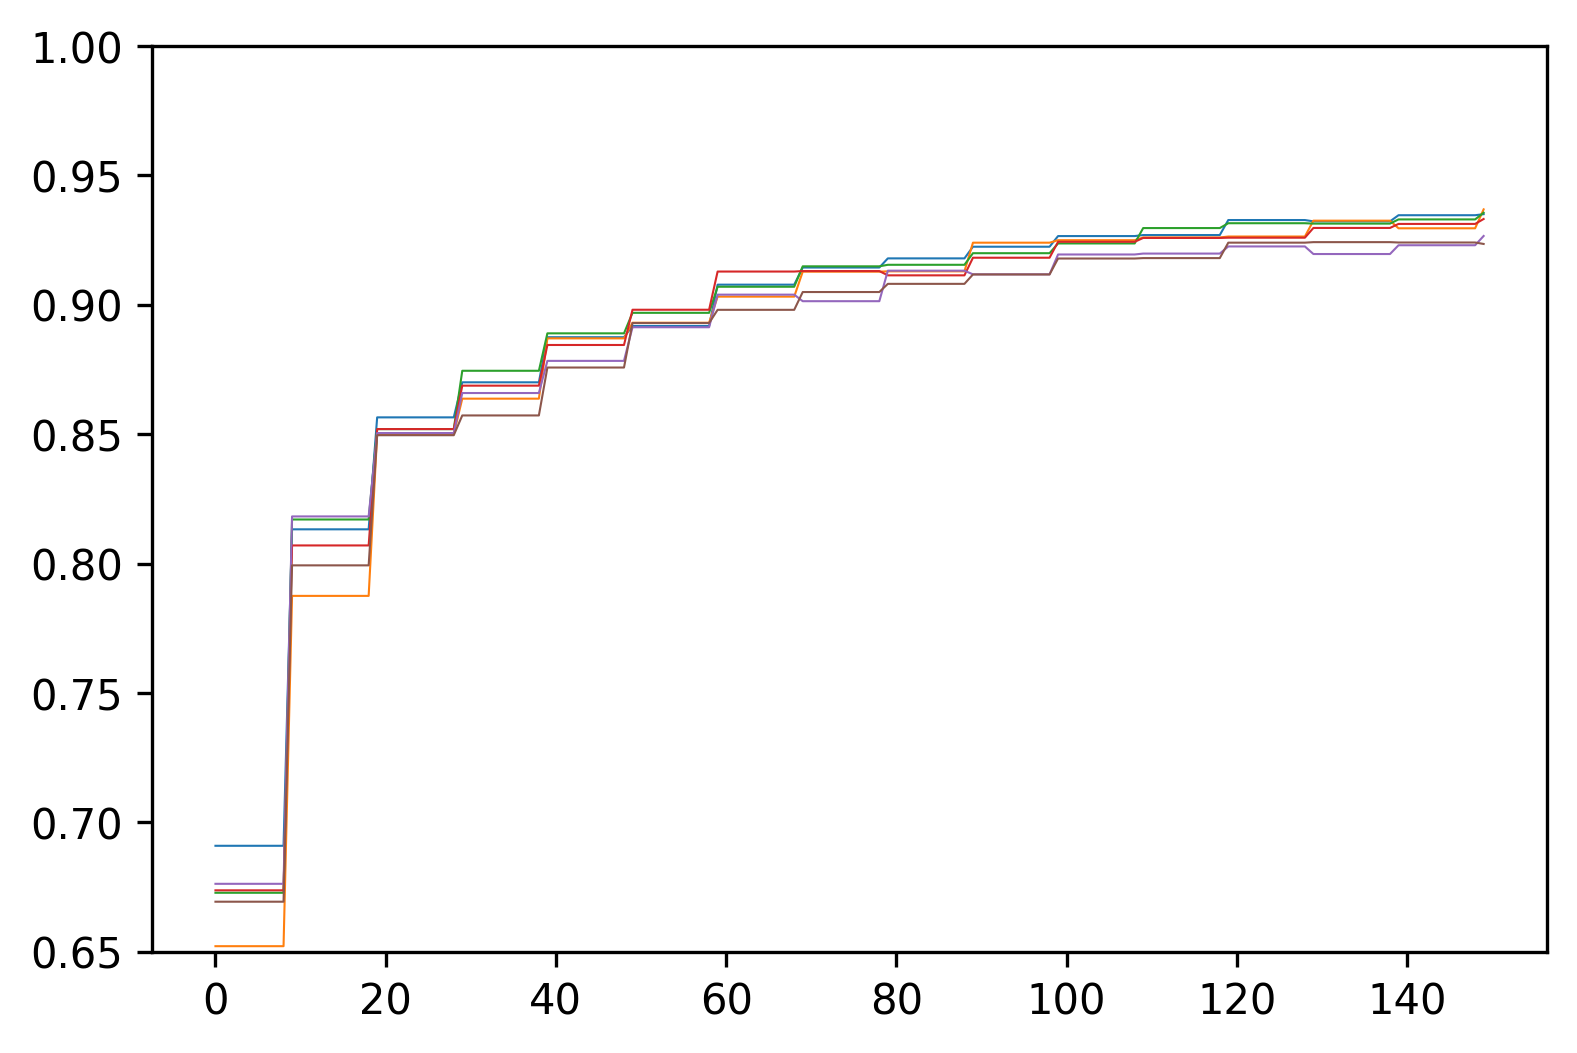

In [34]:
plot_curves(collect(curve_list, 'train_loss'), ylim=[-0.1, 1.0], agg=np.mean)
plot_curves(collect(curve_list, 'train'), ylim=[0.65, 1.00])

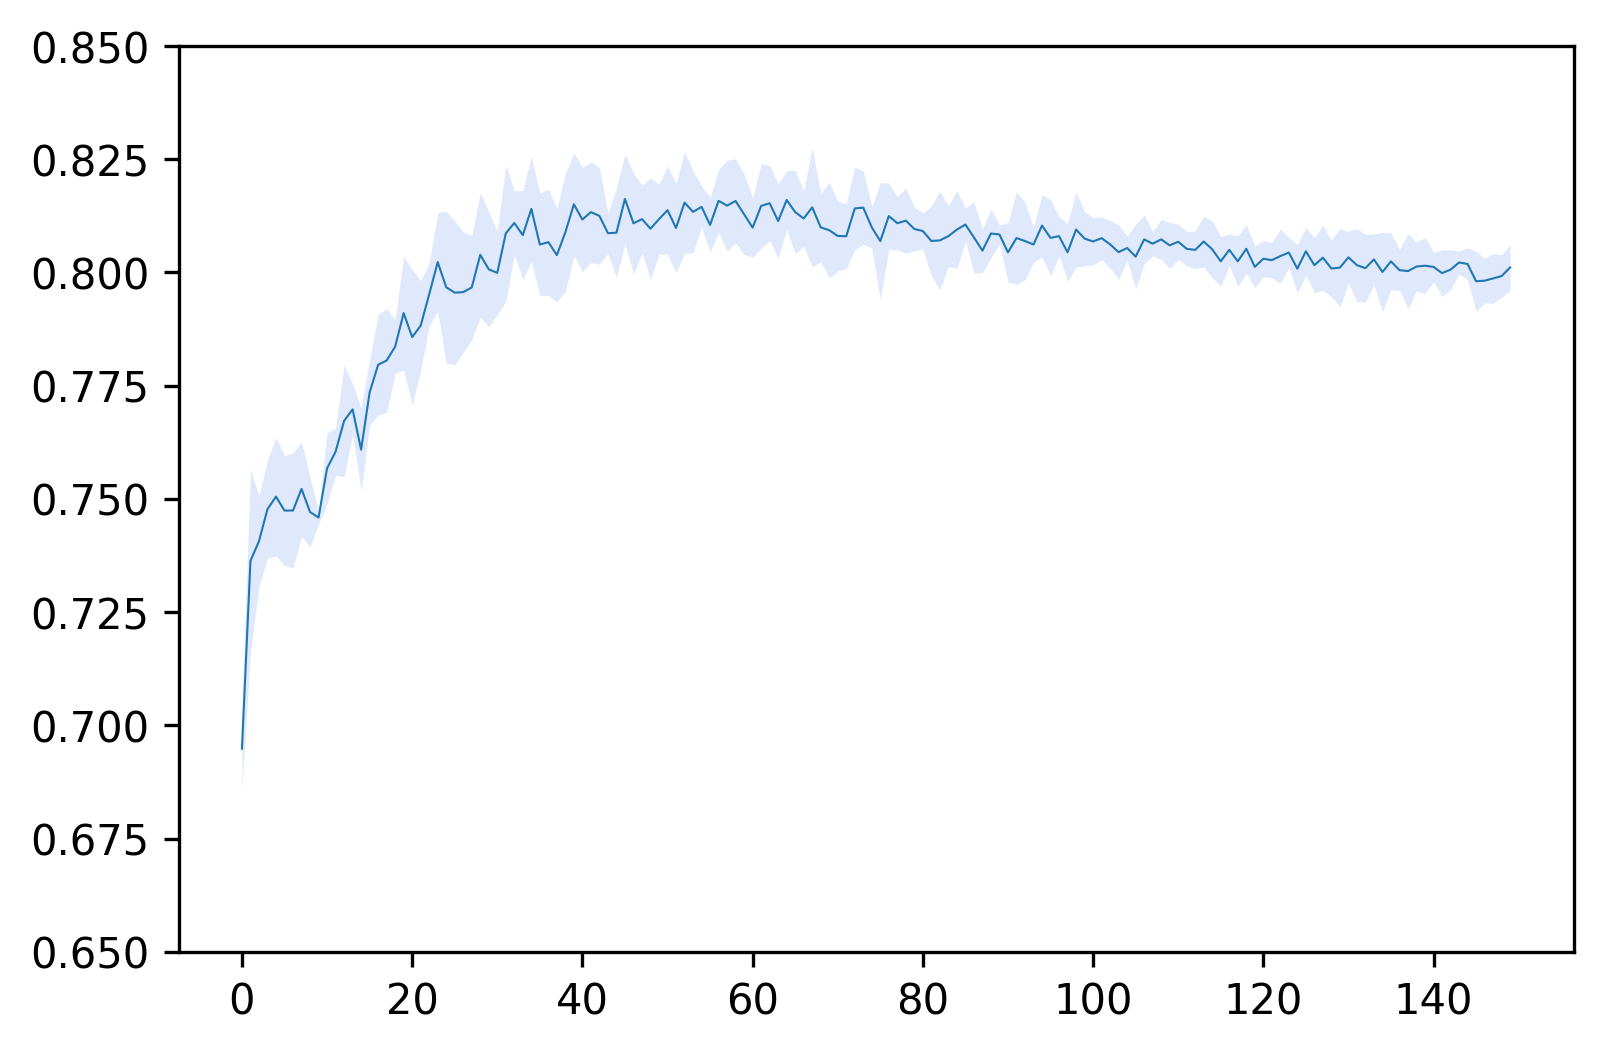

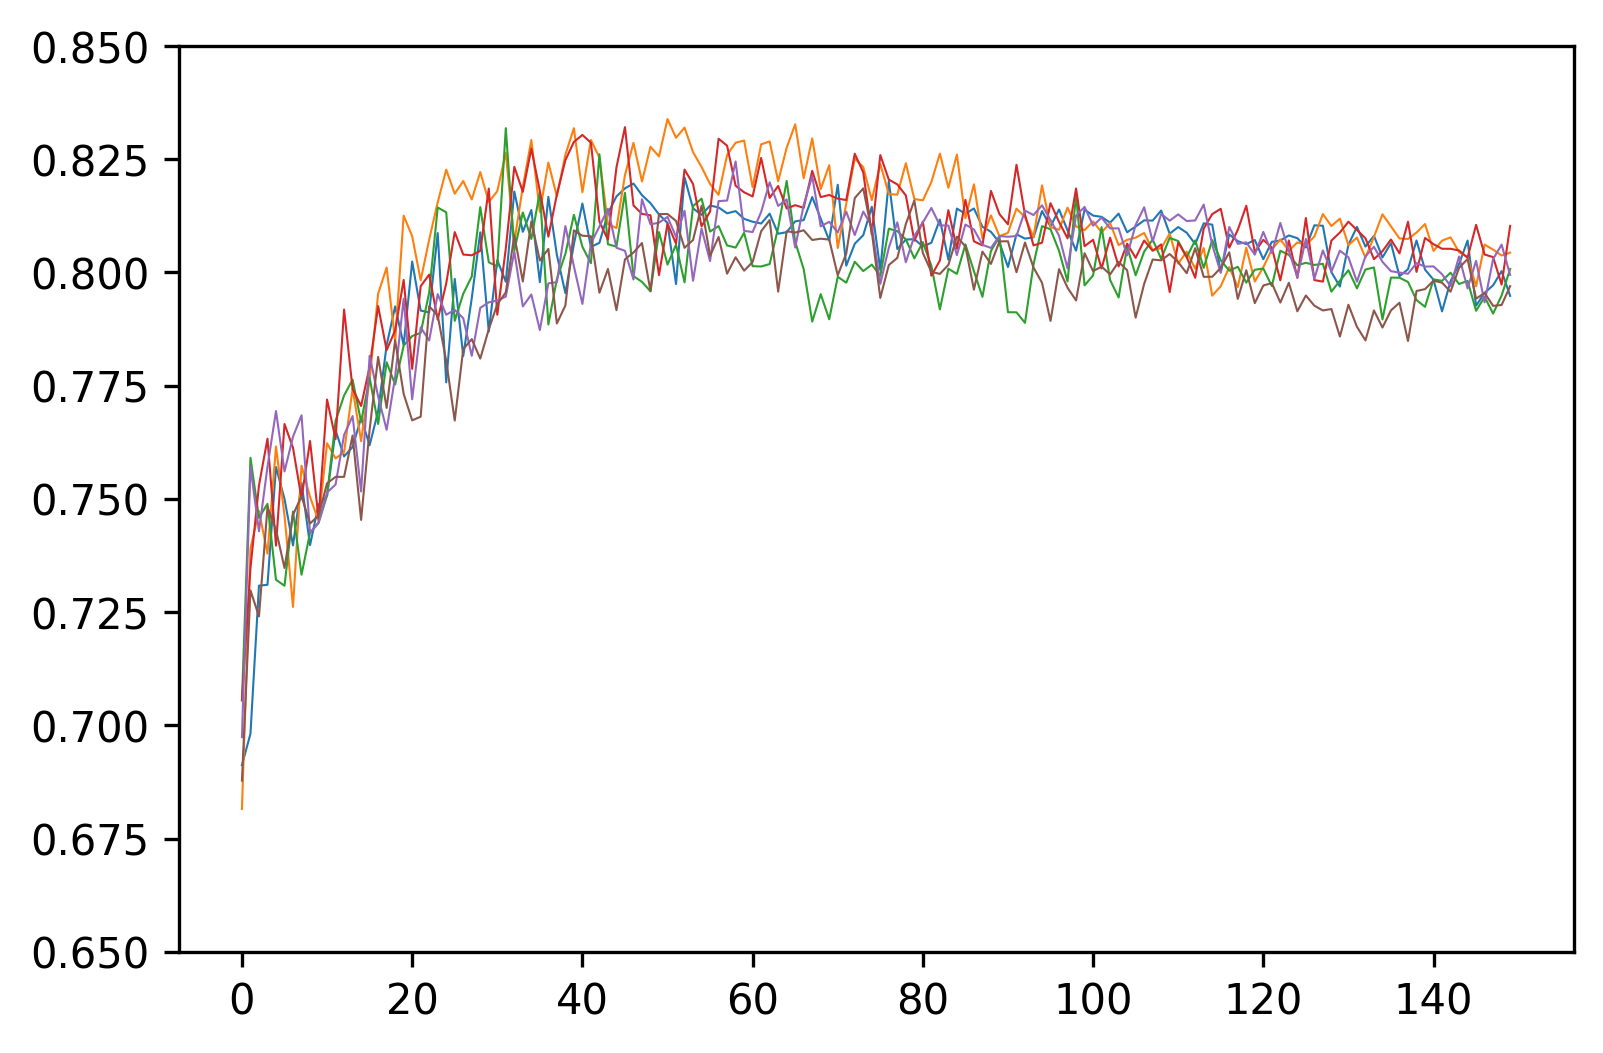

In [35]:
plot_curves(collect(curve_list, 'val'), ylim=[0.65, 0.85], agg=np.mean, err_agg=np.std)
plot_curves(collect(curve_list, 'val'), ylim=[0.65, 0.85])

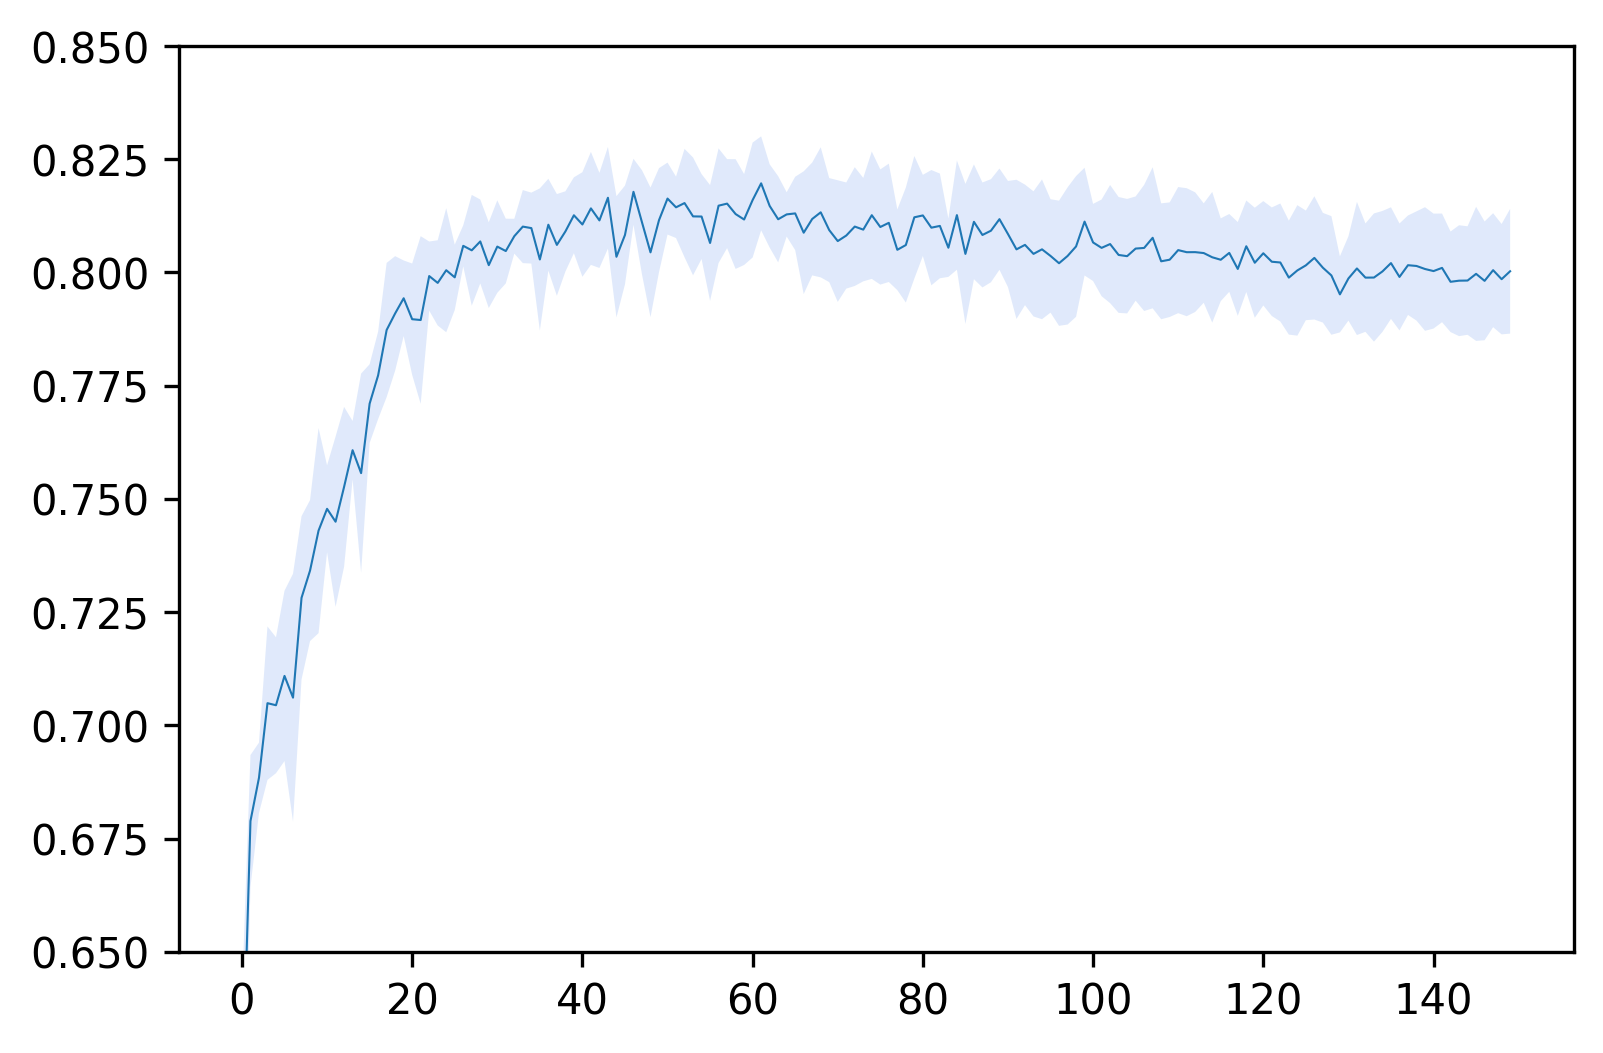

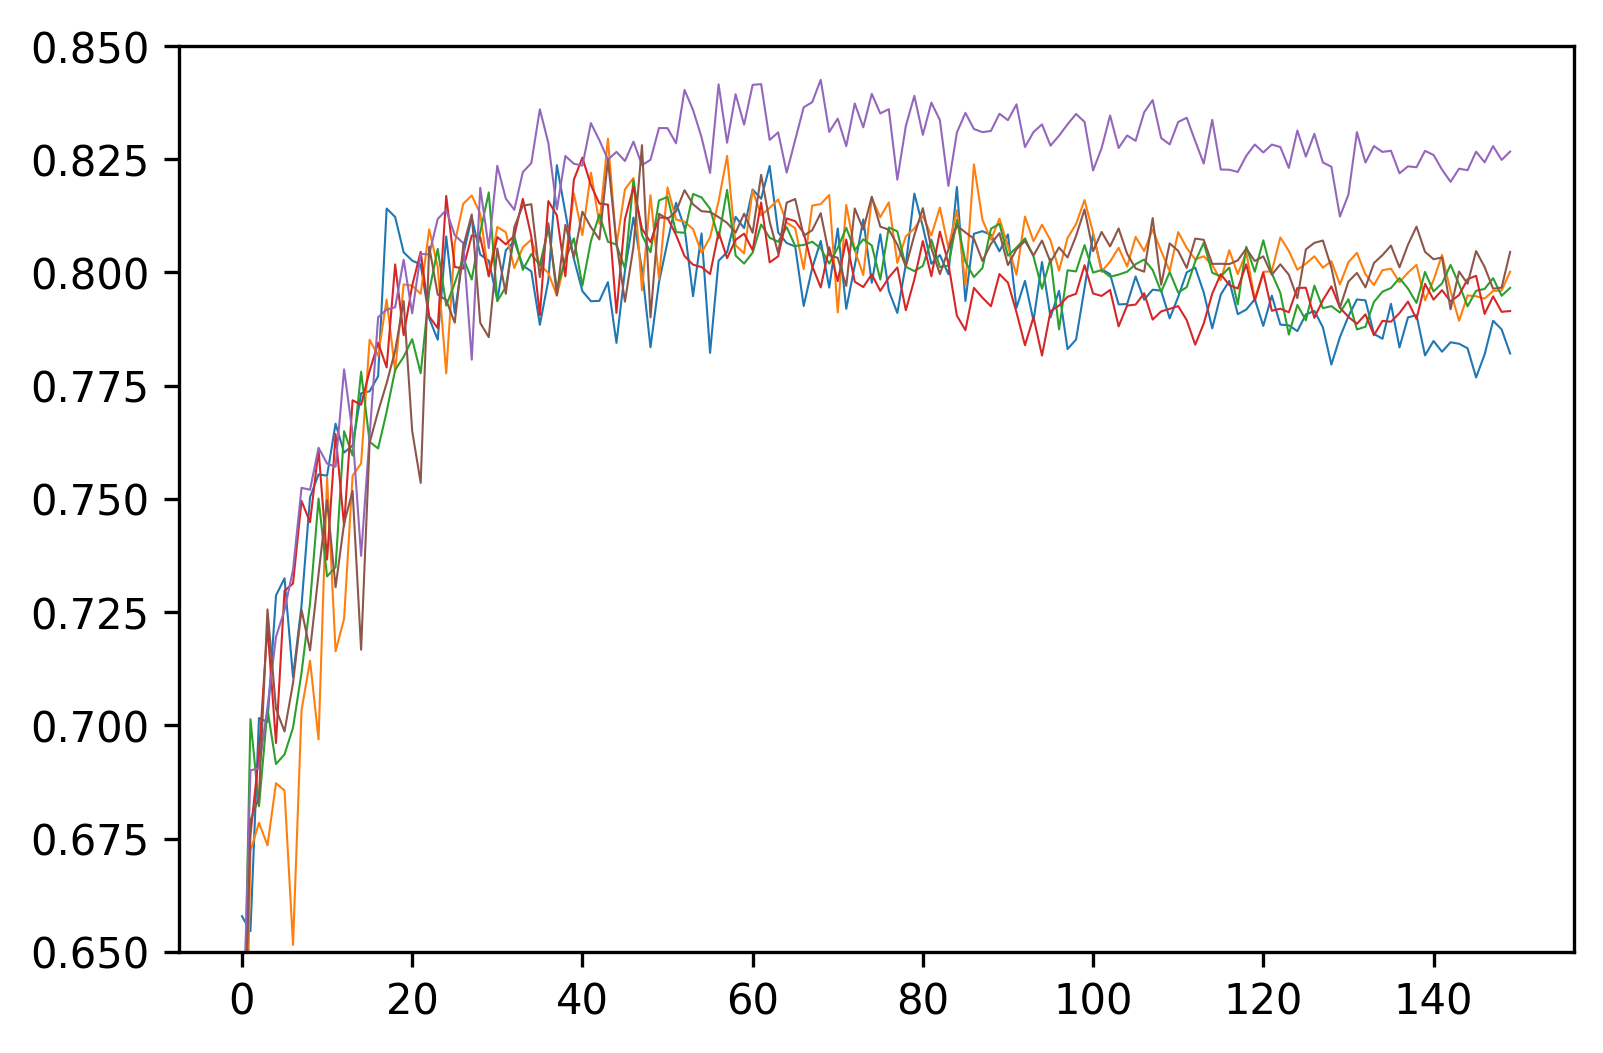

In [36]:
plot_curves(collect(curve_list, 'test'), ylim=[0.65, 0.85], agg=np.mean, err_agg=np.std)
plot_curves(collect(curve_list, 'test'), ylim=[0.65, 0.85])

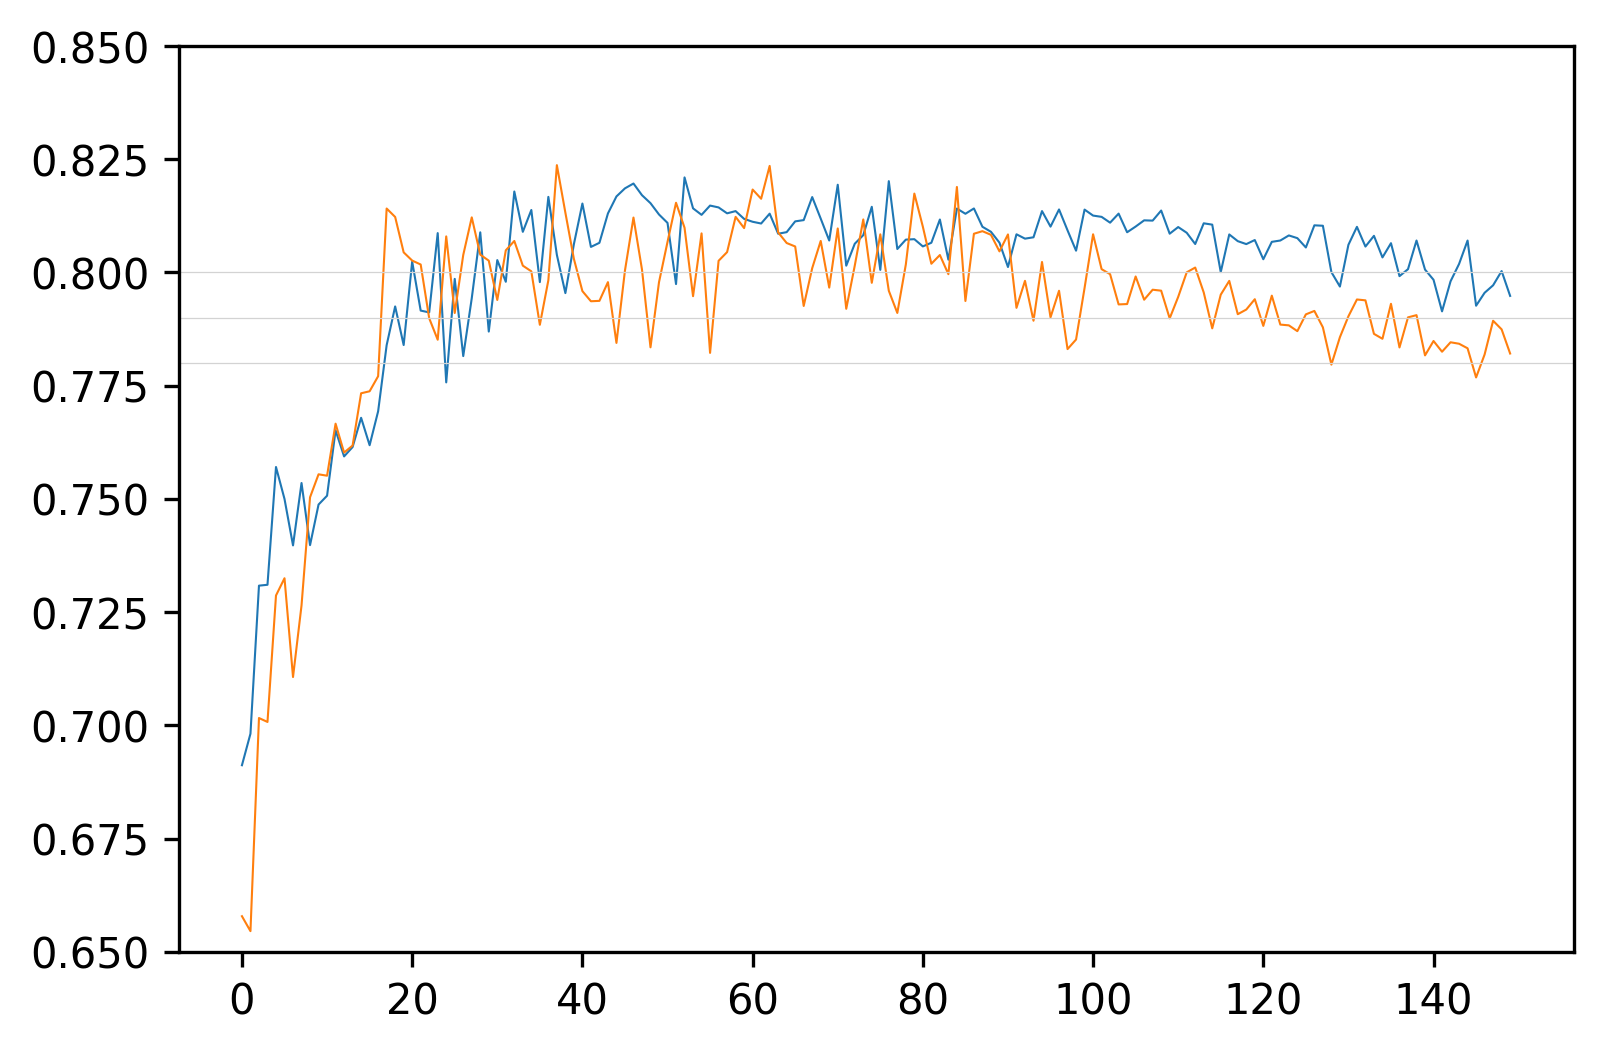

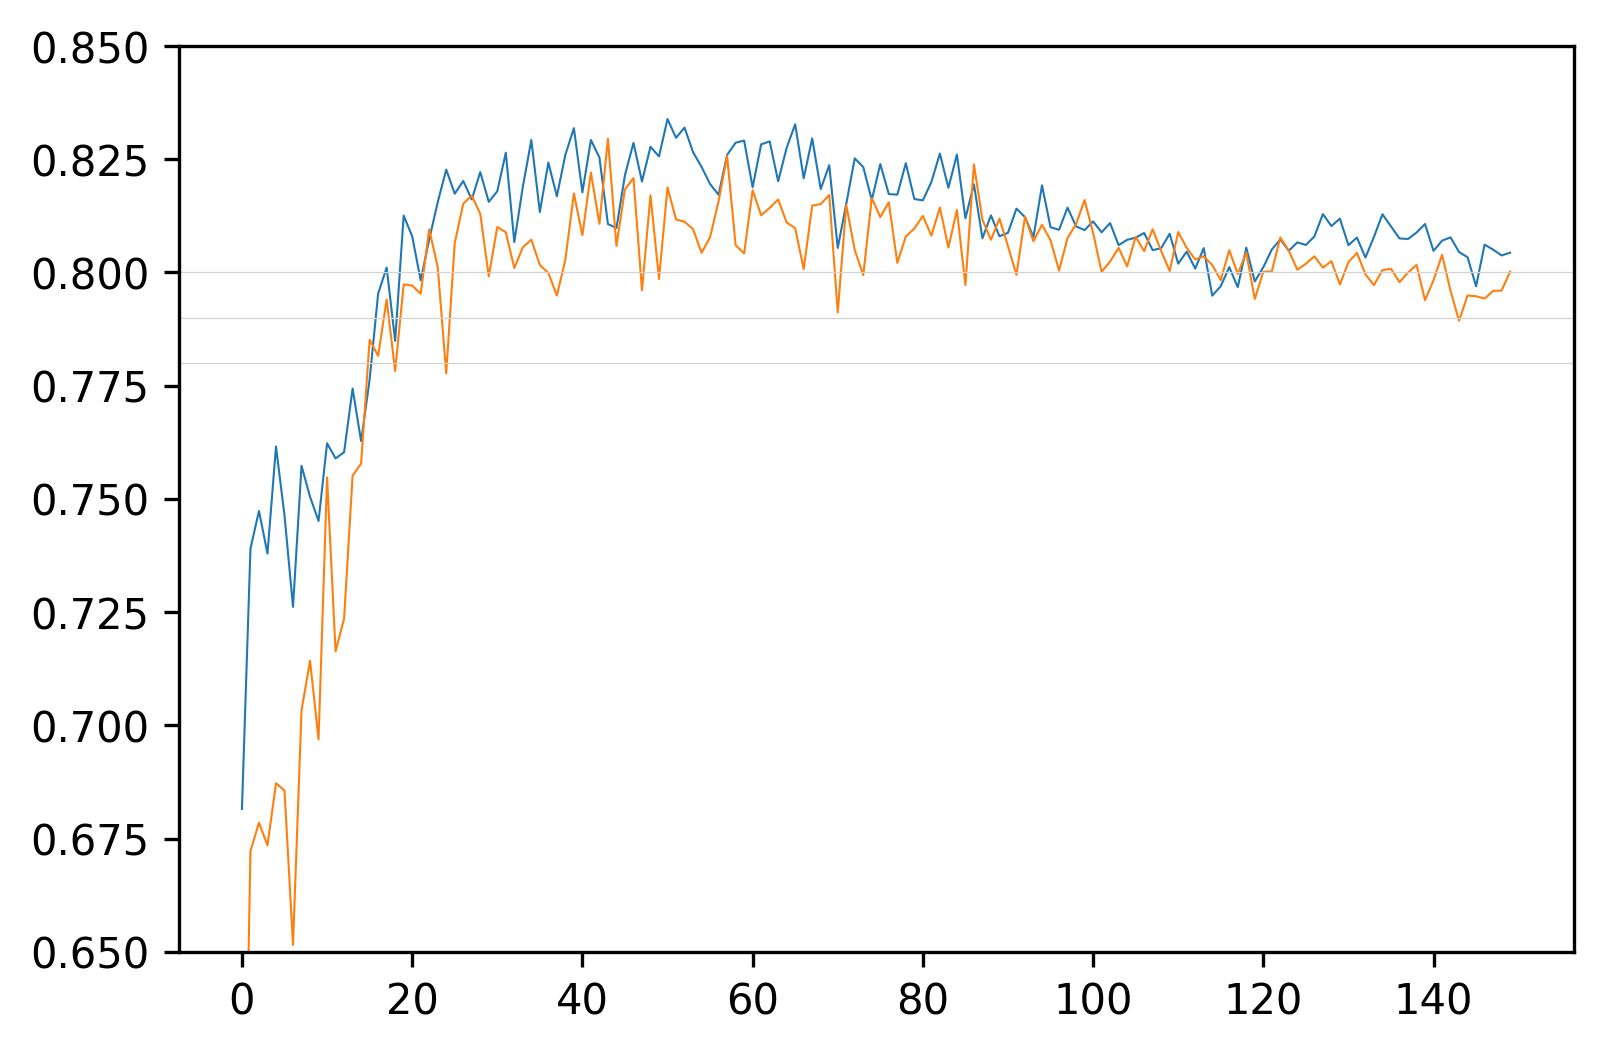

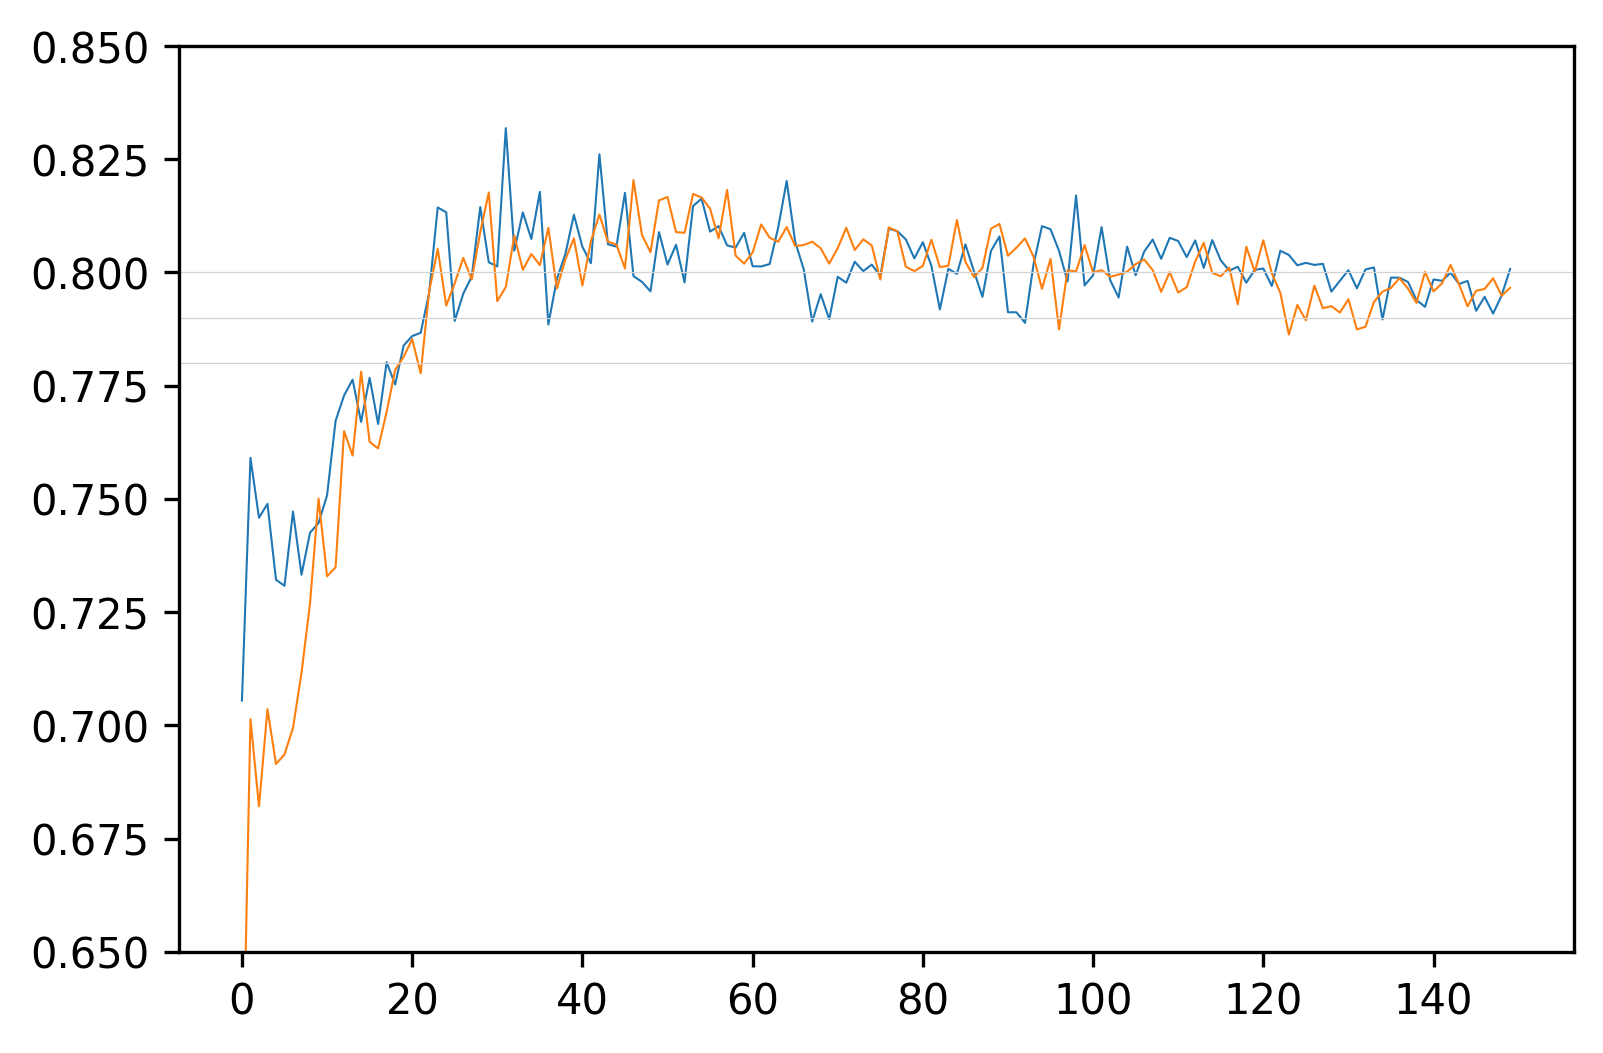

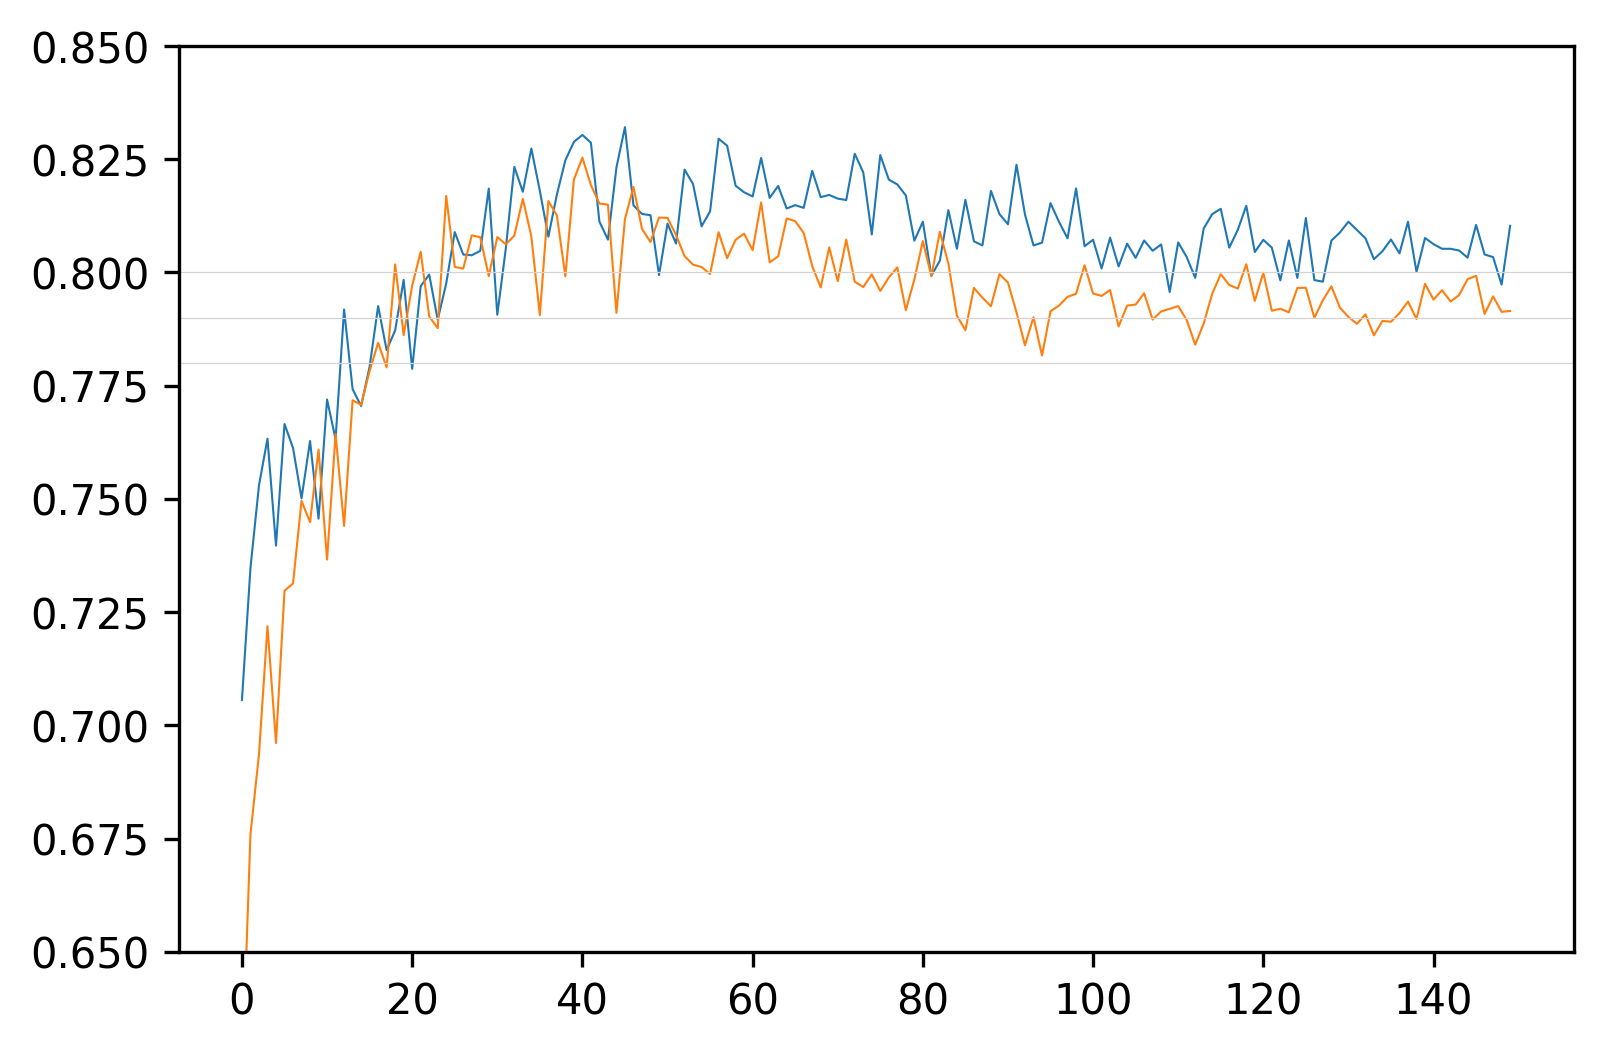

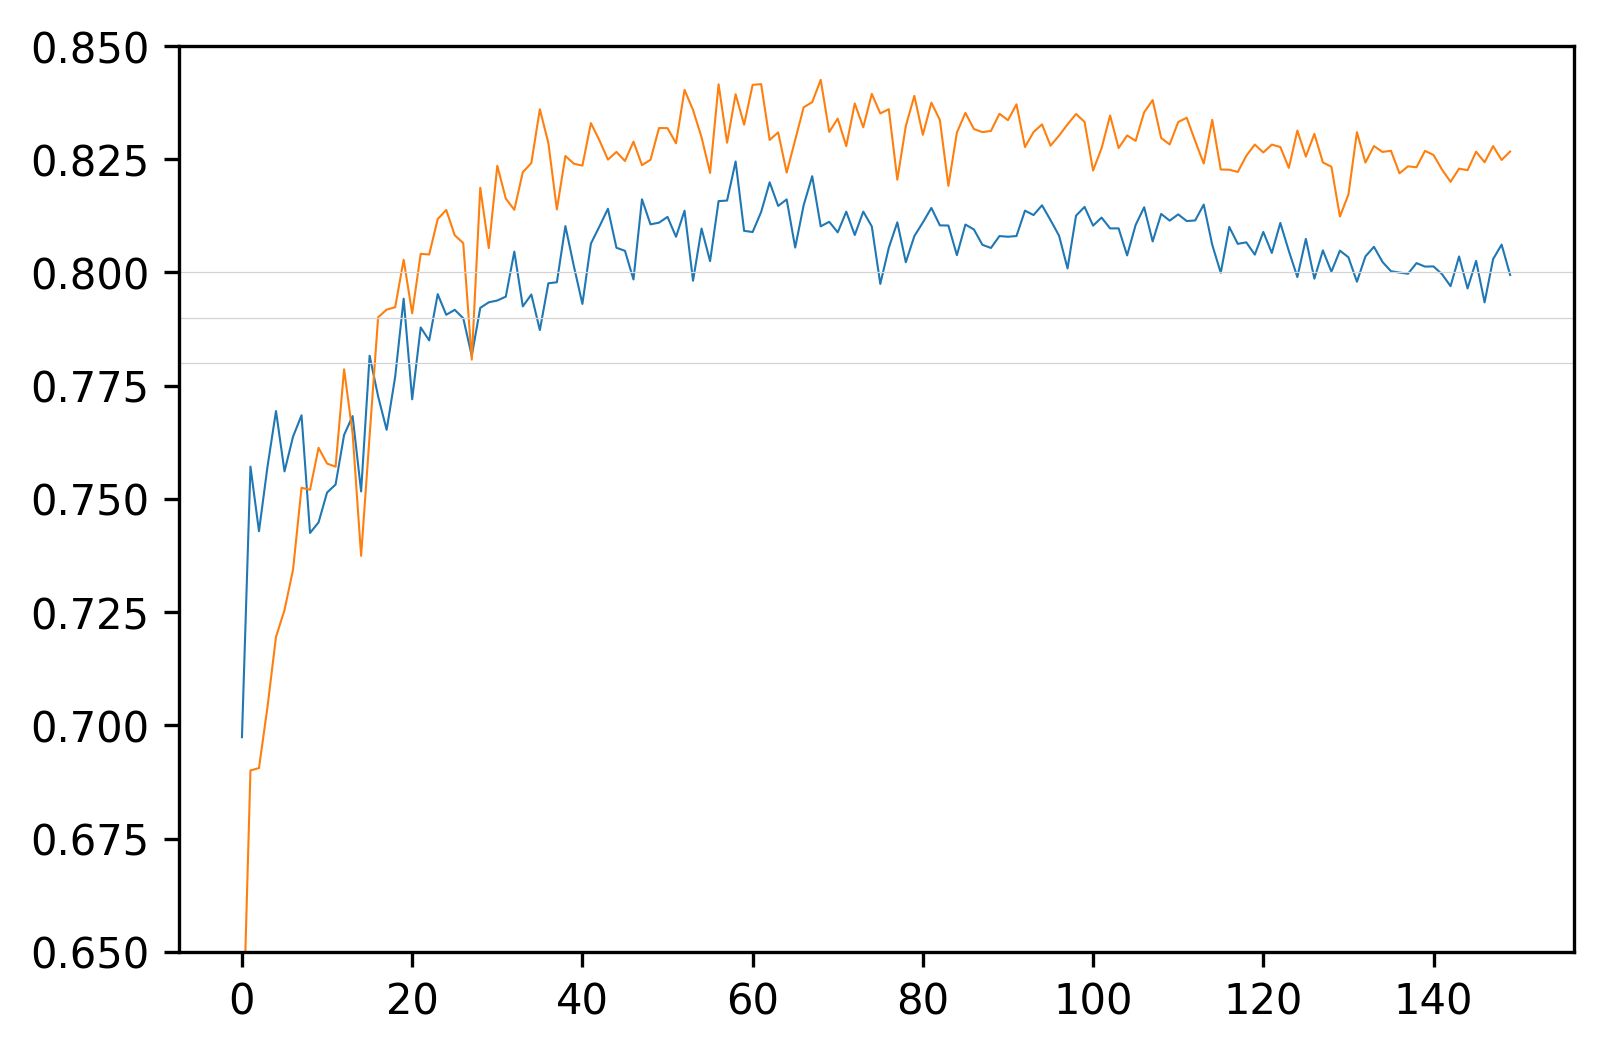

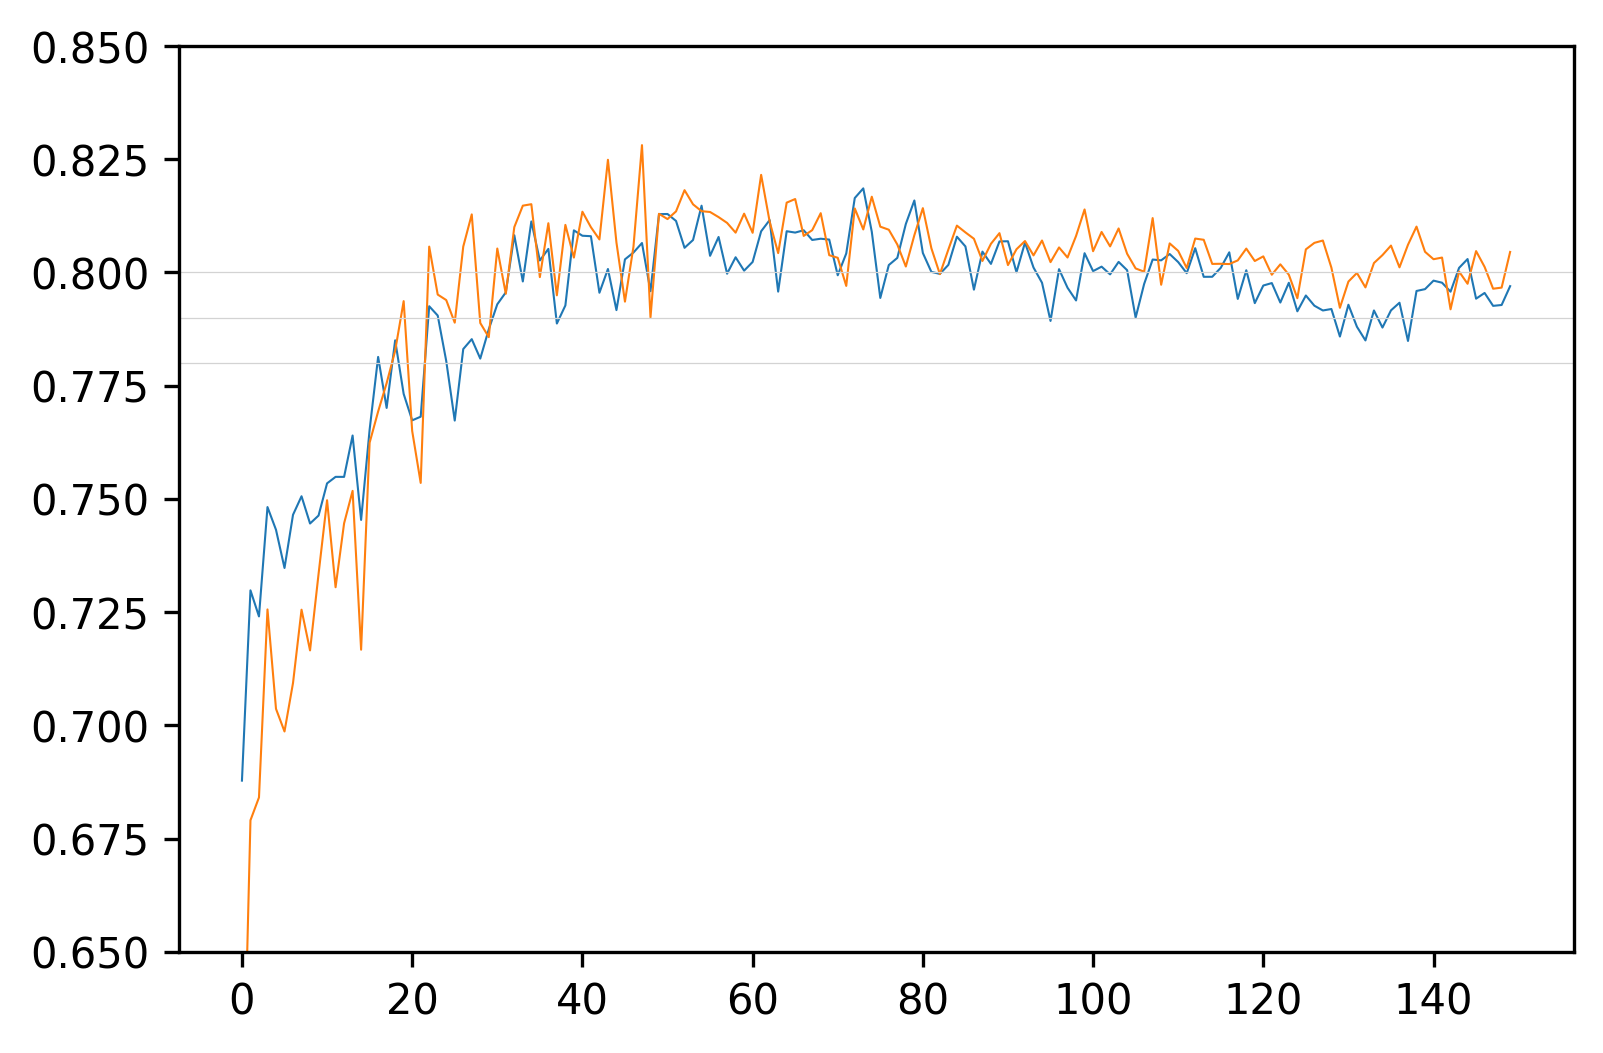

--------------------------
Seed 0 -- val: 0.8209570350774054, test: 0.8098514841924331, idx: 52
Seed 1 -- val: 0.833841612776798, test: 0.81873732594295, idx: 50
Seed 2 -- val: 0.8318299284734472, test: 0.7967593039649278, idx: 31
Seed 5 -- val: 0.8320473251028805, test: 0.8117673187971958, idx: 45
Seed 6 -- val: 0.8244721242406428, test: 0.8393170976650767, idx: 58
Seed 7 -- val: 0.8185350529100528, test: 0.8094652272156666, idx: 73
--------------------------
Val:  0.8269471797635378 ± 0.006483171067035181
Test: 0.8143162929630418 ± 0.014161908463058455


In [37]:
input_data = zip(collect(curve_list, 'val'), collect(curve_list, 'test'))
vals, tests, idxs = list(), list(), list()
for i, (val_curve, test_curve) in enumerate(input_data):
    best_idx = np.argmax(val_curve)
    val_perf = val_curve[best_idx]
    test_perf = test_curve[best_idx]
    vals.append(val_perf)
    tests.append(test_perf)
    idxs.append(best_idx)
    plot_curves([val_curve, test_curve], ylim=[0.65, 0.85], anchors=[0.78, 0.79, 0.80])
print('--------------------------')
for i in range(len(idxs)):
    print(f'Seed {seeds_found[i]} -- val: {vals[i]}, test: {tests[i]}, idx: {idxs[i]}')
print('--------------------------')
print('Val:  {} ± {}'.format(np.mean(vals), np.std(vals, ddof=1)))
print('Test: {} ± {}'.format(np.mean(tests), np.std(tests, ddof=1)))

In [40]:
from ogb.graphproppred import Evaluator

In [47]:
evaluator = Evaluator('ogbg-mollipo')

In [48]:
print(evaluator.expected_input_format)

==== Expected input format of Evaluator for ogbg-mollipo
{'y_true': y_true, 'y_pred': y_pred}
- y_true: numpy ndarray or torch tensor of shape (num_graph, num_task)
- y_pred: numpy ndarray or torch tensor of shape (num_graph, num_task)
where num_task is 1, and each row corresponds to one graph.
nan values in y_true are ignored during evaluation.



In [1]:
import sys
sys.path.append('./../')
from data.utils import compute_ring_2complex

In [2]:
from ogb.graphproppred import PygGraphPropPredDataset

dataset = PygGraphPropPredDataset('ogbg-molpcba', './../datasets/MOLPCBA/raw/')

In [3]:
graph = dataset[55970]

In [4]:
graph.x.shape

torch.Size([1, 9])

In [5]:
graph.edge_attr

tensor([], size=(0, 3), dtype=torch.int64)

In [12]:
graph.edge_index

tensor([], size=(2, 0), dtype=torch.int64)

In [6]:
complex = compute_ring_2complex(
                                graph.x,
                                graph.edge_index,
                                graph.edge_attr,
                                graph.num_nodes,
                                y=graph.y,
                                max_k=6,
                                include_down_adj=False)

In [11]:
complex.chains

{0: <data.complex.Chain at 0x7fcf8cc97cd0>}